In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/content/drive/MyDrive/workshop/circles.png')

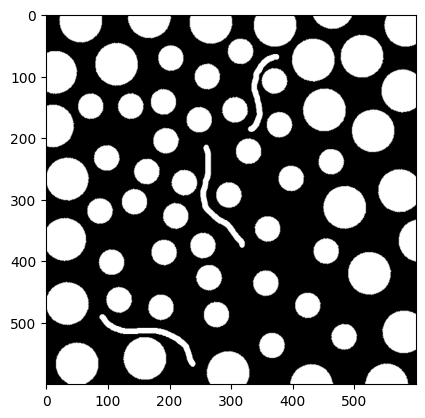

In [ ]:
plt.imshow(image,cmap='gray')

In [ ]:
def dilation(img,element_size):
  element = np.ones((element_size,element_size))
  return cv2.dilate(img,element)

def erosion(img,element_size):
  element = np.ones((element_size,element_size))
  return cv2.erode(img,element)

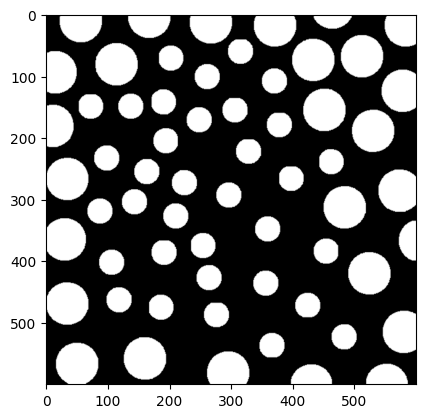

In [ ]:
image_eroded = erosion(image,11)
image_eroded_dilated = dilation(image_eroded,11)

plt.imshow(image_eroded_dilated)

In [ ]:
def open (img , element):
  img_eroded = cv2.erode(img,element)
  return cv2.dilate(img_eroded,element)

def close (img , element):
  img_dilated = cv2.dilate(img,element)
  return cv2.erode(img_dilated,element)

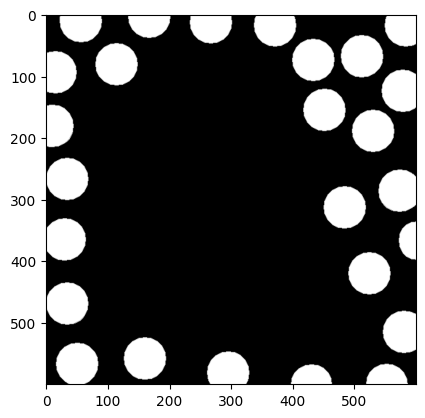

In [ ]:
r = 25
element = np.fromfunction(lambda x,y: (x-r)**2 + (y-r)**2 <= r**2 , (2*r+1,2*r+1)).astype('uint8')
img_open = open(image_eroded_dilated , element)
plt.imshow(img_open)

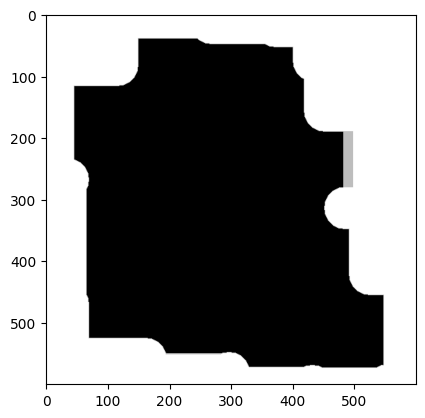

In [ ]:
s = 90
imge_large = close(img_open,np.ones((s,s)).astype('uint8'))
plt.imshow(imge_large)

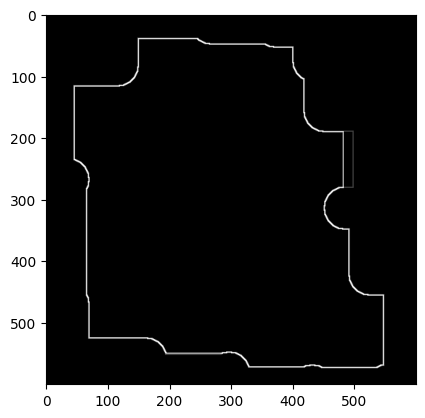

In [ ]:
borders = dilation(imge_large,3) - erosion(imge_large,3)
plt.imshow(borders)

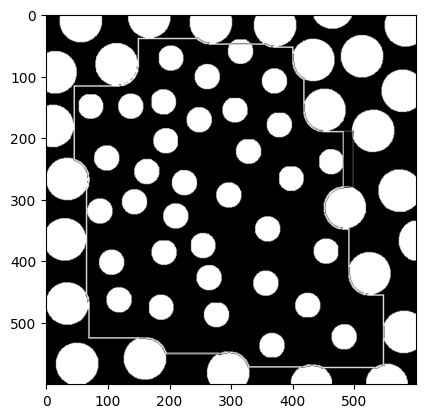

In [ ]:
plt.imshow(image_eroded_dilated + borders)

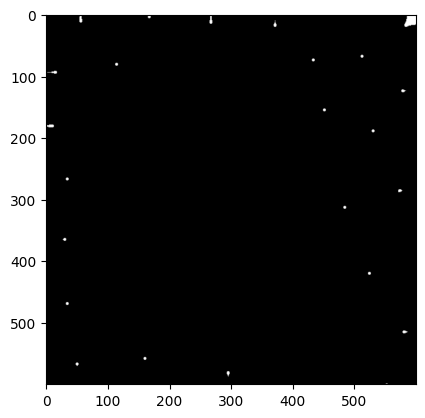

In [ ]:
r = 32
element = np.fromfunction(lambda x,y: (x-r)**2 + (y-r)**2 <= r**2 , (2*r+1,2*r+1)).astype('uint8')
img_open2 = cv2.erode(img_open , element)
plt.imshow(img_open2)

In [ ]:
img_open2.max()

0